## Does it matter if I use FFT vs FFT2 ?

## Why do I have to shift the FFT before doing FFT convolution?

To run this notebook you need to install tnia-python to generate the multi figure plots and access the helper function that makes the Gaussian kernel (pip install tnia-python)

This notebook was generated to help understand this [forum question](https://forum.image.sc/t/richardson-lucy-deconvolution-for-2d-image-image-degradation-after-one-iteration/65657/10) 


##  Get an example image

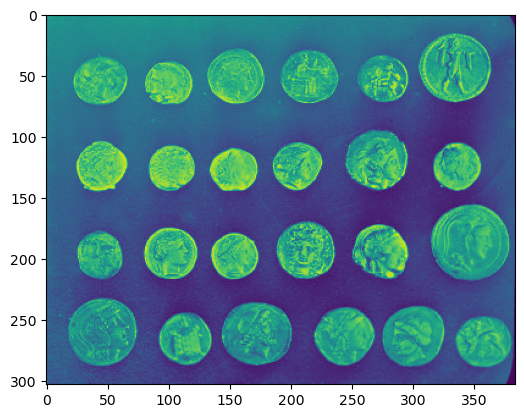

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import os 
from skimage import data
from tnia.plotting.plt_helper import imshow_multi2d

# open scikit-image example
img = data.coins()

plt.imshow(img)

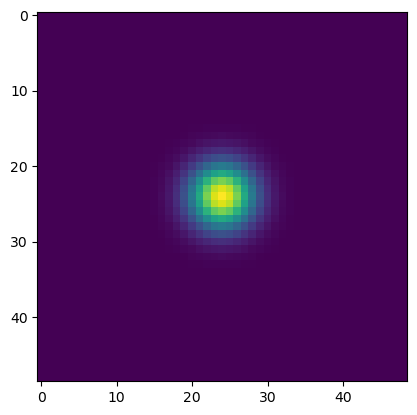

In [2]:
from tnia.deconvolution.gaussian_psf import gaussian_2d

psf = gaussian_2d(49, 3)

plt.imshow(psf)

## Perform convolution in the FFT domain

Convolution can be implemented using multiplicaton in the frequency domain [wikipedia explanation](https://en.wikipedia.org/wiki/Convolution_theorem)

The below code performs convolution in the frequency domeain with a psf (no shift) and with the shifted psf.

The first (no shift) results in a shift in the convolution.  This is because by convention the origin is at 0,0 thus (from the persepective of FFT convolution) the case where the origin in the center of the image is "shifted".

Also note that after the first convolution we print out the datatype.  This is because Sijie Hao asked 

"can you elaborate on the use of ‘real’ at the end? I’ve seen other codes before without .real. Maybe that’s for a different purpose?"

Note that after fft convolution the datatype is complex.  However the complex part should be non-significant (we started with a real signal and real kernel so after inverse transform we should be back to a real signal again).

So why the complex numbers? See [here](https://stackoverflow.com/questions/10304532/why-does-fft-produce-complex-numbers-instead-of-real-numbers) for an attempt to express the intuition.  

Google (or ask chatgpt) for more info.

or if you like textbooks try 

[Signals and System, Oppenheim](https://www.abebooks.com/servlet/BookDetailsPL?bi=31198144449&ref_=ps_ggl_11147913055&cm_mmc=ggl-_-US_Shopp_Textbook-_-product_id=COM9780136511755USED-_-keyword=&gclid=CjwKCAiAkp6tBhB5EiwANTCx1LWuDw4NTtri4JkJGaPYzehSCuPxnDlc6ap77At36znoBrkNdtHIXxoCoeIQAvD_BwE)

or

[Digital Signal Processing, Porat](https://www.thriftbooks.com/w/a-course-in-digital-signal-processing_boaz-porat/342581/item/6369774/?utm_source=google&utm_medium=cpc&utm_campaign=shopping_everything_else_customer_acquisition&utm_adgroup=&utm_term=&utm_content=593719077582&gad_source=4&gclid=CjwKCAiAkp6tBhB5EiwANTCx1IjtGxyLeD5hZVS5RWAW0bCKJuf39beJwnUE2VH7dclubdJU1NSa-xoC0zkQAvD_BwE#idiq=6369774&edition=4286399)




data type before converting to real is  complex128
data type after converting to real is  float64


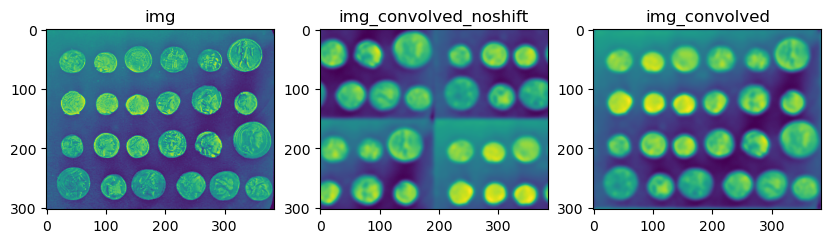

In [4]:

from tnia.deconvolution.pad import pad

psf_pad, _ = pad(psf, img.shape, 'constant')
psf_shift_pad = np.fft.fftshift(psf_pad) 

# case 1 - convolution with no shift
img_convolved_noshift = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(psf_pad))

print('data type before converting to real is ',img_convolved_noshift.dtype)
img_convolved_noshift = img_convolved_noshift.real
print('data type after converting to real is ',img_convolved_noshift.dtype)

# case 2 - convolution with shift
img_convolved = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(psf_shift_pad)).real

fig=imshow_multi2d([img, img_convolved_noshift, img_convolved], ['img', 'img_convolved_noshift', 'img_convolved'],1,3)

## fft vs fft2

What is the difference between fft and fft2?  fft is 1-dimensional even when applied to a 2 dimensional signal it results in a 1d FFT applied to each row. (see below)

uint8
(303, 384)
(303, 384)
complex128
complex128


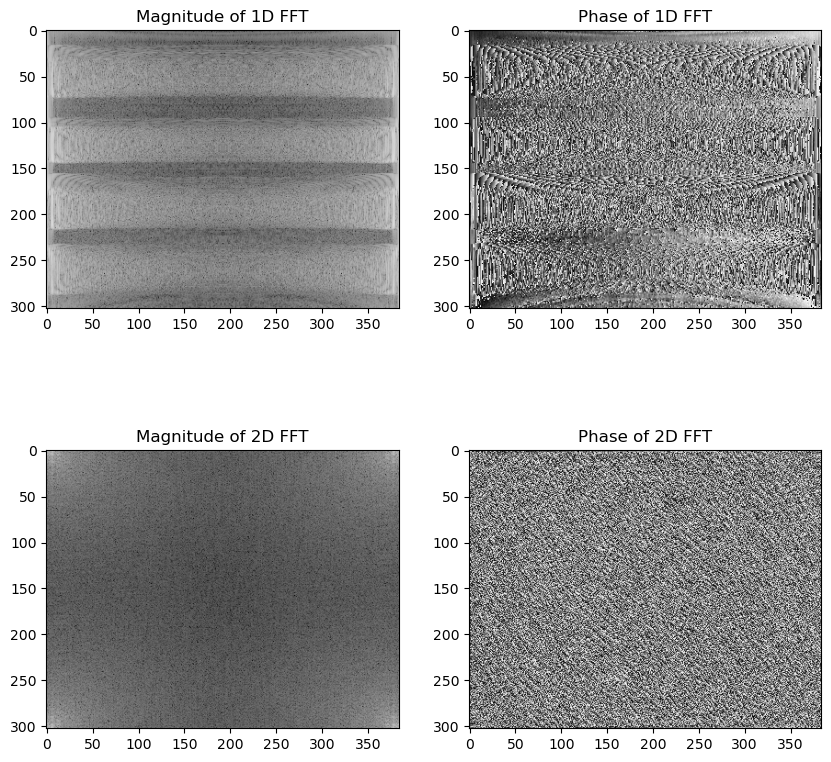

In [30]:
from numpy.fft import fft, fft2

# Fourier transform of the image
img_fft = fft(img)
img_fft2 = fft2(img)

print(img.dtype)

print(img_fft.shape)
print(img_fft2.shape)

print(img_fft.dtype)
print(img_fft2.dtype)


# Calculate the magnitude and phase of the Fourier transforms
magnitude_fft = np.abs(img_fft)
phase_fft = np.angle(img_fft)

magnitude_fft2 = np.abs(img_fft2)
phase_fft2 = np.angle(img_fft2)

# Display the magnitude and phase
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# For the 1D FFT
axs[0, 0].imshow(np.log(magnitude_fft), cmap='gray')
axs[0, 0].set_title('Magnitude of 1D FFT')

axs[0, 1].imshow(phase_fft, cmap='gray')
axs[0, 1].set_title('Phase of 1D FFT')

# For the 2D FFT
axs[1, 0].imshow(np.log(magnitude_fft2), cmap='gray')
axs[1, 0].set_title('Magnitude of 2D FFT')

axs[1, 1].imshow(phase_fft2, cmap='gray')
axs[1, 1].set_title('Phase of 2D FFT')

plt.show()



float64
(49, 49)
(49, 49)
complex128
complex128


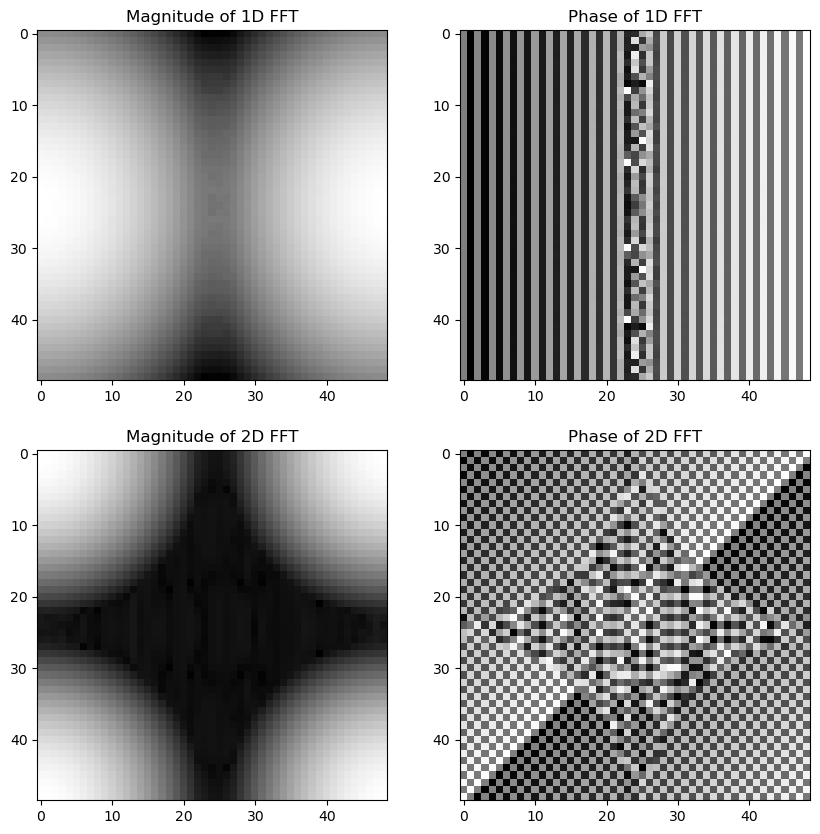

In [31]:

# Fourier transform of the psf 
psf_fft = fft(psf)
psf_fft2 = fft2(psf)

print(psf.dtype)

print(psf_fft.shape)
print(psf_fft2.shape)

print(psf_fft.dtype)
print(psf_fft2.dtype)


# Calculate the magnitude and phase of the Fourier transforms
magnitude_fft = np.abs(psf_fft)
phase_fft = np.angle(psf_fft)

magnitude_fft2 = np.abs(psf_fft2)
phase_fft2 = np.angle(psf_fft2)

# Display the magnitude and phase
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# For the 1D FFT
axs[0, 0].imshow(np.log(magnitude_fft), cmap='gray')
axs[0, 0].set_title('Magnitude of 1D FFT')

axs[0, 1].imshow(phase_fft, cmap='gray')
axs[0, 1].set_title('Phase of 1D FFT')

# For the 2D FFT
axs[1, 0].imshow(np.log(magnitude_fft2), cmap='gray')
axs[1, 0].set_title('Magnitude of 2D FFT')

axs[1, 1].imshow(phase_fft2, cmap='gray')
axs[1, 1].set_title('Phase of 2D FFT')

plt.show()

